# Question

How has the usage of the word time evolved throughout literary works ranging from before the Industrial revolution until 1899? 

# Introduction

Until recently, the literary scholar has employed the tool of close reading to assist in analyzing text: reading between the lines to find the micro interactions between a novel, the author, the novel and its culture, the novel and its political atmosphere, the novel and science, etc. In close reading, the scholar picks a single work to shreds, interpreting the text, in ways that even the author could not imagine. For example, using textual devices such as the interruption within a novel such as Laurence Sterne’s *The Life and Opinions of Tristram Shandy, Gentleman* a critic could explicate the notion of how time was perceived in the mid 1700’s. Or, uncovering trauma within an author's text could unveil suppressed personal memories that only manifest when the person is presented with certain objects or instances. Thus scholars have typically only used their own knowledge, coupled with other philosophical and scholarly work to one novel at a time.

 Enter then, the computer era, and the invention of programming tools such as Python, R, and automated tools such as Voyant that are able to, with shocking rapidity, scan an entire corpus of texts. With tools such as these, a new method of analysis became available to scholars: distant reading. Right at the beginning of the new century, literary critic Franco Moretti (2000) coined the term, defining distant reading as “understanding literature not by studying particular texts, but by aggregating and analyzing massive amounts of data”. By aggregating massive amounts of text, the scholar can see trends and patterns throughout whole periods of time by running programs such as those mentioned above, a method that close reading could simply not do. In distant reading, the macro interactions of novels are revealed. In distant reading, the macro interactions of novels are revealed, meaning the interactions between novels and their time periods, between a corpus of authors, etc. This new approach can reveal insights that would be impossible – or extremely difficult – to uncover through traditional methods. For example, patterns in language or themes used by a corpus of authors can be identified, and the gradual increase of the usages of certain words can be used to examine broader cultural trends, including but not limited to the relationship between literature and scientific ideas. These analyses are not without their limitations however. As distant reading relies on computational analysis rather than the human eye, results can sometimes be difficult to conceptualize. However, despite this, it has emerged as an invaluable tool for literary scholars to understand works within their broader context. For this project, I will be doing just that. I will be telling the story of how industrialization affected human thought gradually over the course of ~400 years through literary works. By choosing works from the pristine, pre-industrialized periods, I hope to show the subtle changes of thought based on word usage in literature.


# Cleaning & Statistical Analysis

In [1]:
import pandas as pd

# making dataframe
df = pd.read_csv("data set literature.csv")

# output the dataframe
print(df)



                                       Gutenberg Link  Date  \
0   https://www.gutenberg.org/files/1232/1232-h/12...  1532   
1       https://www.gutenberg.org/cache/epub/53489...  1554   
2       https://www.gutenberg.org/cache/epub/29622...  1549   
3       https://www.gutenberg.org/files/15272/1527...  1590   
4       https://www.gutenberg.org/files/49065/4906...  1511   
5       https://www.gutenberg.org/cache/epub/9371/...  1635   
6       https://www.gutenberg.org/files/55426/5542...  1619   
7       https://www.gutenberg.org/cache/epub/10847...  1605   
8       https://www.gutenberg.org/files/996/996-h/...  1617   
9       https://www.gutenberg.org/files/48688/4868...  1603   
10      https://www.gutenberg.org/files/20890/2089...  1698   
11      https://www.gutenberg.org/files/19116/1911...  1620   
12      https://www.gutenberg.org/files/66359/6635...  1651   
13      https://www.gutenberg.org/cache/epub/20/pg...  1644   
14      https://www.gutenberg.org/cache/epub/4391/...  

In [2]:
import requests

# Read the data from the CSV file
df = pd.read_csv('data set literature.csv')

# Drop rows with missing URLs
df.dropna(subset=['Gutenberg Link'], inplace=True)

# Loop through each URL in the DataFrame and download the content
for i, row in df.iterrows():
    url = row['Gutenberg Link']
    response = requests.get(url)
    with open(f'book{i}.txt', 'wb') as f:
        f.write(response.content)



In [3]:
import os
import re
import requests

# define the URL to download
url = 'https://www.gutenberg.org/cache/epub/41256/pg41256-images.html'

# define the directory path to save the file
directory = '1700-1800'

# create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# define the filename to save the file as
filename = os.path.join(directory, 'pg41256-images.html')

# download the webpage
response = requests.get(url)

# save the HTML file
with open(filename, 'wb') as f:
    f.write(response.content)

print(f"The webpage has been downloaded and saved as {filename}.")


The webpage has been downloaded and saved as 1700-1800/pg41256-images.html.


In [4]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stop_words = ["new", "york", "city", "like", "would"]
stop_words = stop_words.union(custom_stop_words)


In [5]:
# Define a helper function to count occurrences of a word in a file
def count_word_in_file(filename, word):
    with open(filename, 'r', encoding='iso-8859-1') as f:
        contents = f.read()
        words = contents.lower().split()
        word_count = words.count(word)
        return word_count

# Read in the dataframe
df = pd.read_csv("data set literature.csv")

# Loop through each book file and count the number of times the word "time" appears
time_counts = []
for i, row in df.iterrows():
    filename = f'book{i}.txt'
    word_count = count_word_in_file(filename, 'time')
    time_counts.append(word_count)

# Add the time count values as a new column in the dataframe
df['Time Count'] = time_counts

# Output the updated dataframe
print(df)

                                       Gutenberg Link  Date  \
0   https://www.gutenberg.org/files/1232/1232-h/12...  1532   
1       https://www.gutenberg.org/cache/epub/53489...  1554   
2       https://www.gutenberg.org/cache/epub/29622...  1549   
3       https://www.gutenberg.org/files/15272/1527...  1590   
4       https://www.gutenberg.org/files/49065/4906...  1511   
5       https://www.gutenberg.org/cache/epub/9371/...  1635   
6       https://www.gutenberg.org/files/55426/5542...  1619   
7       https://www.gutenberg.org/cache/epub/10847...  1605   
8       https://www.gutenberg.org/files/996/996-h/...  1617   
9       https://www.gutenberg.org/files/48688/4868...  1603   
10      https://www.gutenberg.org/files/20890/2089...  1698   
11      https://www.gutenberg.org/files/19116/1911...  1620   
12      https://www.gutenberg.org/files/66359/6635...  1651   
13      https://www.gutenberg.org/cache/epub/20/pg...  1644   
14      https://www.gutenberg.org/cache/epub/4391/...  

In [6]:
def extract_words_from_file(filename):
    with open(filename, 'r', encoding='iso-8859-1') as f:
        contents = f.read()
        words = ''.join(c if c.isalpha() else ' ' for c in contents).lower().split()
        return words

        return words
for i in range(len(df)):
    filename = f"book{i}.txt"
    words = extract_words_from_file(filename)
    print(f'{filename}: {len(words)} words')
    



book0.txt: 56745 words
book1.txt: 38625 words
book2.txt: 242346 words
book3.txt: 153821 words
book4.txt: 240318 words
book5.txt: 41421 words
book6.txt: 218643 words
book7.txt: 72763 words
book8.txt: 481034 words
book9.txt: 271811 words
book10.txt: 144473 words
book11.txt: 43107 words
book12.txt: 49142 words
book13.txt: 101352 words
book14.txt: 39650 words
book15.txt: 40238 words
book16.txt: 231164 words
book17.txt: 150819 words
book18.txt: 128568 words
book19.txt: 44877 words
book20.txt: 240349 words
book21.txt: 110908 words
book22.txt: 113452 words
book23.txt: 45941 words
book24.txt: 73860 words
book25.txt: 178471 words
book26.txt: 82533 words
book27.txt: 210948 words
book28.txt: 211650 words
book29.txt: 70261 words
book30.txt: 117161 words
book31.txt: 16477 words
book32.txt: 299005 words
book33.txt: 51914 words


In [7]:
# Loop through each row in the DataFrame and print the title, author, and date
for i, row in df.iterrows():
    title = row['Title']
    author = row['Author']
    date = row['Date']
    print(f"Book {i}: '{title}' by {author}, published in {date}")
def count_word_in_file(filename, word):
    with open(filename, 'r', encoding='iso-8859-1') as f:
        contents = f.read()
        words = contents.lower().split()
        word_count = words.count(word)
        return word_count



Book 0: 'The Prince' by Niccolò Machiavelli, published in 1532
Book 1: 'The Life of Lazarillo de Tormes' by Anonymous, published in 1554
Book 2: 'The Book of Common Prayer' by Thomas Cranmer, published in 1549
Book 3: 'The Faerie Queene' by Edmund Spencer, published in 1590
Book 4: 'The Book of Luther' by Martin Luther, published in 1511
Book 5: 'Four Plays' by William Wycherley, published in 1635
Book 6: ' The Maids Tragedy' by Francis Beaumont and John Fletcher, published in 1619
Book 7: ' The History of Don Quixote' by Miguel de Cervantes, published in 1605
Book 8: 'The Poems ' by John Donne, published in 1617
Book 9: 'The Revenge of Bussy D'Ambois' by George Chapman, published in 1603
Book 10: 'A Short View of the Immorality, and Profaneness of the English Stage' by by Jeremy Collier, published in 1698
Book 11: 'A Journal of the Pilgrims at Plymouth' by Dwight B. Heath, published in 1620
Book 12: 'Leviathan ' by Thomas Hobbes, published in 1651
Book 13: 'Principles of Philosophy' b

In [8]:
def count_word_in_file(filename, word):
    with open(filename, 'r', encoding='iso-8859-1') as f:
        contents = f.read()
        words = contents.lower().split()
        word_count = words.count(word)
        return word_count

# Loop through each book file and count the number of times the word "time" appears
for i, row in df.iterrows():
    filename = f'book{i}.txt'
    word_count = count_word_in_file(filename, 'time')
    print(f"Book {i}: {word_count} occurrences of the word 'time'")


Book 0: 76 occurrences of the word 'time'
Book 1: 34 occurrences of the word 'time'
Book 2: 192 occurrences of the word 'time'
Book 3: 33 occurrences of the word 'time'
Book 4: 173 occurrences of the word 'time'
Book 5: 24 occurrences of the word 'time'
Book 6: 105 occurrences of the word 'time'
Book 7: 15 occurrences of the word 'time'
Book 8: 494 occurrences of the word 'time'
Book 9: 48 occurrences of the word 'time'
Book 10: 45 occurrences of the word 'time'
Book 11: 29 occurrences of the word 'time'
Book 12: 30 occurrences of the word 'time'
Book 13: 26 occurrences of the word 'time'
Book 14: 32 occurrences of the word 'time'
Book 15: 23 occurrences of the word 'time'
Book 16: 188 occurrences of the word 'time'
Book 17: 128 occurrences of the word 'time'
Book 18: 175 occurrences of the word 'time'
Book 19: 21 occurrences of the word 'time'
Book 20: 144 occurrences of the word 'time'
Book 21: 107 occurrences of the word 'time'
Book 22: 102 occurrences of the word 'time'
Book 23: 10

# A Broad Stroke

The expansion of London during the latter half of the 18th century saw the rise of industry, with the first modern factory, the Slater Mill. While this benefited humanity in ways that were not immediately apparent, the damage this would do would be felt to the present day such as deforestation, increased carbon dioxide emissions, and constant light pollution. The industrialization of cities like London also polluted human life, with young children being forced into dangerous factory work and losing cherished innocence through harsh working conditions. The damages and pain inflicted on children and the working classes were not the only effects of industrialization, it also forever changed humanity's natural perception of time. This period of history marked the beginning of a significant shift in human thought and behavior, as people began to think of time as something that could be measured, standardized, and used for economic purposes.


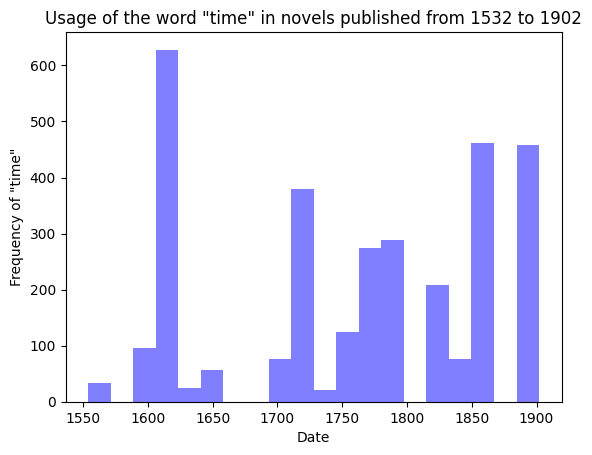

In [9]:
import matplotlib.pyplot as plt

# read in the dataset
df = pd.read_csv("data set literature.csv")

# create a new column for the word count of "time" in each book
df['Time Count'] = 0

# loop through each book file and count the number of times the word "time" appears
for i, row in df.iterrows():
    filename = f'book{i}.txt'
    with open(filename, 'r', encoding='iso-8859-1') as f:
        contents = f.read()
        words = contents.lower().split()
        word_count = words.count('time')
        df.at[i, 'Time Count'] = word_count

# filter the dataframe to only include books published between 1532 and 1902
filtered_df = df[(df['Date'] >= 1550) & (df['Date'] <= 1902)]

# group the filtered dataframe by year and sum the time counts
grouped_df = filtered_df.groupby('Date')['Time Count'].sum().reset_index()

# plot a histogram of the time count over the years
plt.hist(grouped_df['Date'], bins=20, weights=grouped_df['Time Count'], color='blue', alpha=0.5)
plt.title('Usage of the word "time" in novels published from 1532 to 1902')
plt.xlabel('Date')
plt.ylabel('Frequency of "time"')
plt.show()

# Outlier

The graph above shows the usage of the word "time" in the novels I collected from 1532 - 1902. Though the graph supports my analysis by showing most of the usage between 1800-1902, there is one major outlier, *Don Quixote*, by Miguel Cervantes, which was published in 1605. It is common thought Cervantes was "far ahead of [his] time" with his seminal novel. Scholars even state that he played with themes that did not become popular for another century or two, which ties in perfectly with my observation that "time" was not showing more frequently in novels before 1700. 

# 1790 to 1902

The period from 1800 to 1902 saw significant changes in the world, with the emergence of industrialization and the rise of the working class. The first set of literary works that were chosen were from this period of time. Within a corpus of ten works of Gothic literature from across the century, ranging from Mary Shelly’s Frankenstein to Bram Stoker's *Dracula*, the word time was used a total of 2,320 times. This is unsurprising, as factory work and living by the clock was basically a standard for the working class in the Victorian era. Not to mention the construction of Big Ben in 1843, would have cemented the concept of time in everyone’s minds. Not only Big Ben, but the railway as well made the passage of time a constant in Victorian thought. So much so, that scholars read *Dracula* as a manifestation of this. Some claim that Stoker critiques the automaton-like nature of living by the clock. Johnathan Harker’s trip across the forest to the Count’s place of residence is viewed as time travel to a place locked in the past, and while this past is full of fears rooted in superstition, it is still quaint. Big Ben, the railroads, and *Dracula* all lead back to industrialization and factory work, showing how living by the clock dominated cultural thought. This is seen in the fact that even though *Dracula* is told through a retelling of journal entries, as David Seed (1985, 74) states "nothing stands in the way of the narrative's linear impetus", like the clock that continously ticks forward. The fact that the novels chosen for this dataset through this time period have the highest word count of “time” perfectly demonstrates this. 

I chose this wide ranging span of years because in 1902, *Hound of the Baskervilles* by Sir Arthur Conan Doyle was published, which still heavily relied on Victorian values. Ann Radcliff's *A Sicilian Romance* also predicts Victorian values and holds Gothic values held in Victorian decades.


In [10]:
!pip install wordcloud


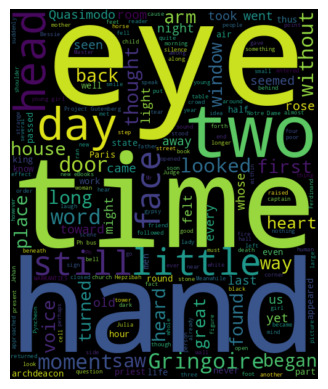

In [11]:
import os
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Create a custom stopwords list
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['href', 'div', 'span', 'class', 'dquo'])
custom_stopwords.update(['br', 'ldquo', 'p', 'mdash', 'footnote', 'rsquo',
                         'rdquo', 'pagenum', 'u','width','nbsp', 'id', 'FNanchor', 'name', 'page', 
                         'pagei', 'hb', 'stanza', 'said', 'one', 'say', 'would', 'right', 'lnumber', 'Quixote', 'Sancho',
                        'linenum', 'F', 'label', 'label', 'pfn', 'F', 'h', 'td td', 'Luther', 'may', 'see', 'make', 'man', 'come',
                        'b', 'trtd', 'thy', 'thee', 'like', 'td td', 'tr', 'td', 'pg', 'could', 'upon', 'much', 'made', 'shall'])

# Read the text files from the directory
text = ''
for filename in os.listdir('1790-1902_texts'):
    # Add an if statement to skip hidden directories
    if not filename.startswith('.'):
        with open(f'1790-1902_texts/{filename}', 'r', encoding='ISO-8859-1') as f:
            text += f.read()
# Remove non-alphabetic characters
text = re.sub('[^A-Za-z]+', ' ', text)

# Generate the wordcloud
wc = WordCloud(width=500, height=600, background_color='black', stopwords=custom_stopwords).generate(text)

# Display the wordcloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


The wordcloud shows how important the concept of time was during the years 1790-1902. 

# 1700-1800

From Daniel Defoe’s Robinson Crusoe to Laurence Sterne’s *The Life and Opinions of Tristram Shandy, Gentleman,* and into the beginnings of Gothic literature, the notion of precise time began seeping into thought between the years 1700 and 1800. The 1,743 instances of the word time, in this subset of works, is a clear statement of the growing phenomenon of relying on the clock. The actual beginnings of the Industrial Revolution are hotly debated, with some placing the start of it around 1750, and others saying around 1760. A novel such as *Tristram Shandy* would support the former with its famous final lines of the opening page “‘pray, my dear,’ quoth my mother’ have you not forgot to wind up the clock?” (Sterne, 1750, 6). On this page, the narrator Tristram, blames this interruption by his mother during his parents’ intimacy for him being generally unlucky. This can be attributed to the rise of the Industrial Revolution, which led to significant change in how people perceived time and the value of their time. As scholar Amit Yahevstates “during this period clocks came to control industrial production” (2018, 873). Tristram’s father was a man so reliant on the clock, that every little bit of his life was dependent on its ticks. It would make sense then for the question to be such a pivotal one, as it interrupted the most important aspect of production to an industrial society: the procreation of new life. Since, as is well known, the Industrial Revolution was notorious for employing massive amounts of children under extremely poor working conditions. 


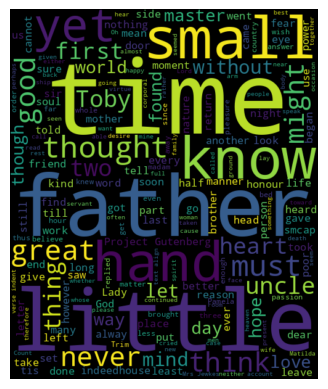

In [12]:
from nltk.corpus import stopwords

# Create a custom stopwords list
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['href', 'div', 'span', 'class', 'dquo'])
custom_stopwords.update(['br', 'ldquo', 'p', 'mdash', 'footnote', 'rsquo',
                         'rdquo', 'pagenum', 'u','width','nbsp', 'id', 'FNanchor', 'name', 'page', 
                         'pagei', 'hb', 'stanza', 'said', 'one', 'say', 'would', 'right', 'lnumber', 'Quixote', 'Sancho',
                        'linenum', 'F', 'label', 'label', 'pfn', 'F', 'h', 'td td', 'Luther', 'may', 'see', 'make', 'man', 'come',
                        'b', 'trtd', 'thy', 'thee', 'like', 'td td', 'tr', 'td', 'pg', 'could', 'upon', 'much', 'made', 'shall', 'well'])

# Read the text files from the directory
text = ''
for filename in os.listdir('1700-1800_texts'):
    # Add an if statement to skip hidden directories
    if not filename.startswith('.'):
        with open(f'1700-1800_texts/{filename}', 'r', encoding='ISO-8859-1') as f:
            text += f.read()
# Remove non-alphabetic characters
text = re.sub('[^A-Za-z]+', ' ', text)

# Generate the wordcloud
wc = WordCloud(width=500, height=600, background_color='black', stopwords=custom_stopwords).generate(text)

# Display the wordcloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


The word cloud shows the growing importance of the word "time".

# 1500-1700

Between the years 1500 and 1700, the world underwent a significant transformation. This period saw the Age of Discovery, the Renaissance, the Reformation, and the Scientific Revolution. It was a time of great social, economic, and cultural changes that laid the foundation for the clock's growing importance in the following centuries. A broader scan of the words revealed more religious words such as “heaven” and “God” being more common. Despite the transformation that occurred during this period, it is fascinating to note the non-use of the word “time”. A possibility for this is that perhaps the concept of time was still evolving in peoples’ minds, people who were farmers, agriculture workers who were not as beholden to clocks, but rather to the rise and fall of the sun and the change of seasons. Though clocks were popping up here and there, bell towers were still enough for most people. The clock as it is known today (mostly) was not adopted in households until the late 15th century, with the first watch appearing in Italy, France, and Germany in 1492, and then only in aristocratic households. From then on, the importance of time and the measurement of it became more and more prominent in people's lives. The Industrial Revolution of the 18th and 19th centuries would further increase the importance of timekeeping, as factories needed to be run on strict schedules to maximize productivity.



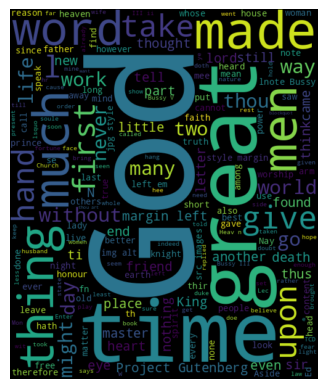

In [13]:
from nltk.corpus import stopwords

# Create a custom stopwords list
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['href', 'div', 'span', 'class', 'dquo'])
custom_stopwords.update(['br', 'ldquo', 'p', 'mdash', 'footnote', 'rsquo',
                         'rdquo', 'pagenum', 'u','width','nbsp', 'id', 'FNanchor', 'name', 'page', 
                         'pagei', 'hb', 'stanza', 'said', 'one', 'say', 'would', 'right', 'lnumber', 'Quixote', 'Sancho',
                        'linenum', 'F', 'label', 'label', 'pfn', 'F', 'h', 'td td', 'Luther', 'may', 'see', 'make', 'man', 'come',
                        'b', 'trtd', 'thy', 'thee', 'like', 'td td', 'tr', 'td', 'pg', 'love', 'know', 'good', 'though', 'shall',
                        'us', 'poem', 'yet', '.', 'let', 'must', 'well', 'could', 'project gutenberg', 'ln'])

# Read the text files from the directory
text = ''
for filename in os.listdir('1500-1700_texts'):
    # Add an if statement to skip hidden directories
    if not filename.startswith('.'):
        with open(f'1500-1700_texts/{filename}', 'r', encoding='ISO-8859-1') as f:
            text += f.read()
# Remove non-alphabetic characters
text = re.sub('[^A-Za-z]+', ' ', text)

# Generate the wordcloud
wc = WordCloud(width=500, height=600, background_color='black', stopwords=custom_stopwords).generate(text)

# Display the wordcloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


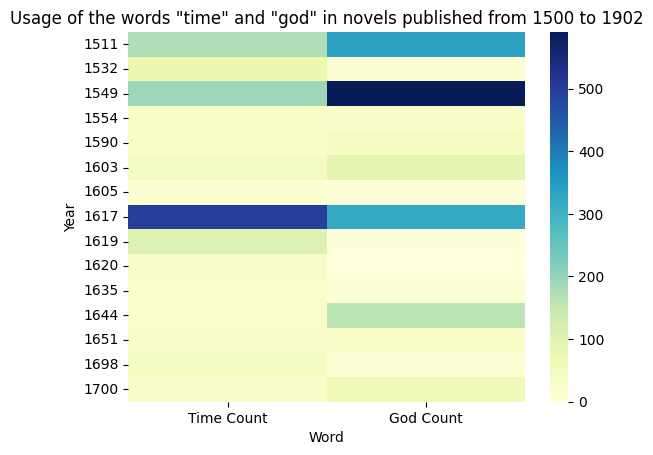

In [14]:

import seaborn as sns

# read in the dataset
df = pd.read_csv("data set literature.csv")

# create new columns for the word counts of "time" and "god" in each book
df['Time Count'] = 0
df['God Count'] = 0

# loop through each book file and count the number of times the words "time" and "god" appear
for i, row in df.iterrows():
    filename = f'book{i}.txt'
    try:
        with open(filename, 'r', encoding='iso-8859-1') as f:
            contents = f.read()
            words = contents.lower().split()
            time_count = words.count('time')
            god_count = words.count('god')
            df.at[i, 'Time Count'] = time_count
            df.at[i, 'God Count'] = god_count
    except FileNotFoundError:
        pass

# filter the dataframe to only include books published between 1500 and 1700
filtered_df = df[(df['Date'] >= 1500) & (df['Date'] <= 1700)]

# group the filtered dataframe by year and sum the word counts
grouped_df = filtered_df.groupby('Date')[['Time Count', 'God Count']].sum()

# plot a heatmap of the word counts over the years
sns.heatmap(grouped_df, cmap="YlGnBu")
plt.title('Usage of the words "time" and "god" in novels published from 1500 to 1902')
plt.xlabel('Word')
plt.ylabel('Year')
plt.show()


This heat map compares the usage of the words "God" and "Time" in a corpus of works from the 1500-1700 time period. The comparison offers valuable information regarding the relative significance and occurrence of these concepts in literature during that era. The histogram depicts that "God" was more frequently used than "Time" in these works, which is not unexpected, given the religious and theological nature of many texts at that time. Notably, both words experienced an increase in usage during the early 1600s, possibly due to the influence of the Protestant Reformation and the emergence of novel concepts and philosophies. 

# Conclusion

In conclusion, distant reading provides a valuable tool for literary scholars to study literature within its broader historical context and to identify patterns and trends such as the one presented above. Though not without its faults, and still requiring human interaction, with a human touch, distant reading becomes a welcome companion to close reading. The analysis of this dataset of literary works through distant reading techniques provides a unique insight into the changing cultural and social trends over time. By examining the usage of certain words and themes across different periods, in this instance the word “time”, subtle shifts in human thought and behavior become clear. For example, the case study presented by the aggregated data highlights the growing importance of time and the clock in society, starting from pre-industrialzied eras, right up to the twentieth century. The lack of the word “time” in the earlier works suggests that in the collective thought “time” as it came to be known in the modern definition was a direct result of the workplaces of the Industrial Revolution, caused by its dependance on hourly shifts and train schedules.


# Important Note

While I tried to be encompassing with my dataset, I do realize it is small and therefore limited. While there's a wealth of information on literature published in previous centuries on Wikipedia, I was reliant on what was available on Project Gutenberg, which did not have everything. I hope to continue to develop this project possibly for my Digital Humanities capstone. 

# References

Raymer, Miles. “Review: Miguel De Cervantes’s ‘Don Quixote.’” words and dirt RSS. Accessed March 18, 2023. http://www.words-and-dirt.com/words/review-miguel-de-cervantess-don-quixote/#:~:text=It's%20hard%20to%20overstate%20how,two%20or%20three%20centuries%20later. 

Schivelbusch, Wolfgang. The Railway Journey the Industrialization of Time and Space in the 19. Century. Leamington Spa: Berg, 1986. 

Seed, David. “The Narrative Method of Dracula.” Nineteenth-Century Fiction 40, no. 1 (1985): 61–75. https://doi.org/10.2307/3044836. 

Sherman, Stuart. Telling Time: Clocks, Diaries, and English Diurnal Form, 1660-1785. Chicago: University of Chicago Press, 1997. 

Yahav, Amit S. Feeling Time: Duration, the Novel, and Eighteenth-Century Sensibility. Philadelphia: University of Pennsylvania Press, 2018. 